 - featrue extraction: feature 몇개만 가져와서 Dense 붙이는 방법.
 - fine tuning: 아예 일부 피처맵 자체를 또 학습 시키는 것.
 
기계학습에 사용될 각각의 데이터를 feature라고 한다.

### 정형 vs 비정형 데이터 차이
정형데이터는 feature들 간의 순서를 바꿔도 상관없다. 하지만 비정형 데이터는 feature들 간의 순서를 바꾸면 문제가 생긴다.

### 데이터가 작을 때 트랜스퍼 러닝을 쓰면?

오퍼피팅을 막아버릴 수 있다. 모델 새로 만드는 것보다 이렇게 해버리는게, 훨씬 좋다.


### pre-trained learning은 transfer learning인가?

엄밀히 말하면 아니다. 그냥 남의 것 가져다 쓰는 것이다.

# Transfer learning with TensorFlow Hub

https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

 - url에서 classification이 붙어있으면, Dense가 붙어있다.

# Applications in keras

https://keras.io/applications/

RESNET은 이미 인간의 능력을 뛰어 넘었다.

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(include_top = False, 
            weights = 'imagenet') # top은 마지막 레이어를 말함.

In [4]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

 - include_top에 따라서 전략이 달라진다. 붙이면 pre-trained이다.
 
레이어 가져오는 방법
 - 엔덱스로 가져오는 방법
 - name으로 가져오는 방법

In [5]:
block_conv1 = vgg.get_layer('block1_conv1')

In [7]:
block_conv1.input

<tf.Tensor 'input_3:0' shape=(None, None, None, 3) dtype=float32>

### 필터 이미지 확인하는 법

In [13]:
filters, bias = block_conv1.get_weights() 
# 이렇게 필터 확인한다.
# 이 필터는 학습될 때마다 바뀌지 않는다. 고정이다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


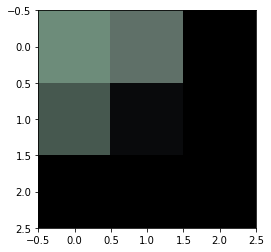

In [22]:
import matplotlib.pyplot as plt
filters[0,...,0].shape
plt.imshow(filters[...,0], cmap = 'gray')

### Extract features with VGG16

 - 파인튜닝은 weight 바꾸는 것!
 - feature extracton은 덴스 붙이는 것!

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [25]:
model = VGG16(weights='imagenet', include_top=False)

img_path = './elepant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# features = model.predict(x)

In [42]:
# model.summary()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


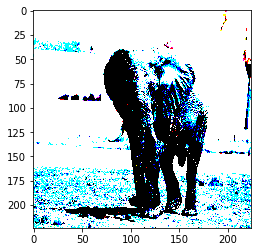

In [31]:
import matplotlib.pyplot as plt
plt.imshow(x.reshape(224, 224, -1))

In [34]:
features = model.predict(x)

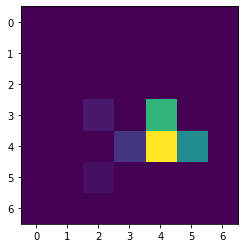

In [49]:
features.shape
# plt.figure(figsize = (20, 10))
plt.imshow(features[0][...,11])

### Extract features from an arbitrary intermediate layer with VGG19

꼼수를 써서 특정 레이어를 통과한 후 모양을 볼 수 있다.

In [1]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
base_model = VGG19(weights = 'imagenet')

In [15]:
model = Model(inputs = base_model.input,
              outputs = base_model.get_layer('block4_conv4').output)

In [10]:
img_path = './elepant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
block4_pool_features = model.predict(x)

In [3]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

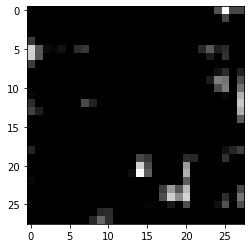

In [17]:
import matplotlib.pyplot as plt
plt.imshow(block4_pool_features[0][...,4], cmap = 'gray')

컨볼루션이 앞에 있을 수록, 전체적인 그림을 잡고 앞에 있을 수록 조금 추상적인 세부적인 특징을 잡아낸다.

 - predict: 피드포워드 시키는 것 ★★★
 
 - feature: 디멘션이다 ★★★ 많으면 좋은데, 데이터 더 필요하다.

# 텐서블로 이미지 복습

https://www.tensorflow.org/tutorials/load_data/images

### 이미지 불러오는 방식 2가지

 - 이미지 데이터 제너레이터
 - 텐서플로 io이용해서 bytes 형태로 불러오는 법

In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

### 이미지 데이터 제너레이터 없이 불러오기

In [3]:
folders = [i for i in os.listdir(data_dir) if i !='LICENSE.txt']

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

이미지 제너레이터는 축복이다.

In [5]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

이미지 성능 높이려면 어쩔 수 없이 crop을 해줘야 한다. 그런데 우리는 시간 없으니까 그냥 resize 쓸 것이다.

In [6]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

vgg16부터는 민맥스 안쓰고 스탠다드라이제이션 시킨다.

In [7]:
BATCH_SIZE = 64
IMG_HEIGHT = 224 # 이미지넷 전용
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE) # next할 때마다 몇 개씩 넣을지

In [8]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [9]:
dir(train_data_gen)
train_data_gen.class_indices # 폴더명이 알아서 클래스로 들어간다.

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

### 모델 케라스에서 가져오기

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

In [11]:
vgg = VGG16(include_top = True,
            weights = 'imagenet')

In [12]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
temp = []
for i in vgg.layers:
    temp.append(i)

In [14]:
temp.pop()

In [15]:
for i in temp:
    i.trainable = False

In [16]:
for j in temp:
    print(j.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [18]:
from tensorflow.keras.models import Sequential
model = Sequential(temp)

In [20]:
from tensorflow.keras.layers import Dense
model.add(Dense(5, activation = 'softmax'))

In [24]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [26]:
model.fit_generator(train_data_gen)

58/58 [==============================] - 69s 1s/step - loss: 1.7290 - categorical_accuracy: 0.3771


### transfer learning 5 flower fit using Tensorflow

In [118]:
import tensorflow as tf
import os
import pathlib

In [119]:
tf.__version__

'2.0.0'

In [209]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

In [121]:
a = str(data_dir/'*/*.jpg')

In [122]:
a

'C:\\Users\\white\\.keras\\datasets\\flower_photos\\*\\*.jpg'

In [123]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle = False)

In [124]:
next(iter(list_ds))

<tf.Tensor: id=5694, shape=(), dtype=string, numpy=b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'>

In [125]:
file_path_test = next(iter(list_ds))
file_path_test

<tf.Tensor: id=5700, shape=(), dtype=string, numpy=b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'>

In [153]:
import numpy as np
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [127]:
def get_labels(file_path):
    return CLASS_NAMES == tf.strings.split(file_path, os.path.sep)[-2]

In [128]:
tf.strings.split(file_path_test, os.path.sep)[-2]

<tf.Tensor: id=5762, shape=(), dtype=string, numpy=b'daisy'>

In [129]:
CLASS_NAMES == tf.strings.split(file_path_test, os.path.sep)[-2]

<tf.Tensor: id=5826, shape=(5,), dtype=bool, numpy=array([ True, False, False, False, False])>

In [130]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

def decode_img(file_path):
    img = tf.io.read_file(file_path)
    npy_img = tf.image.decode_jpeg(img, channels=3)
    npy_img2 = tf.image.convert_image_dtype(npy_img, dtype=tf.float32)
    return tf.image.resize(npy_img2, [IMAGE_WIDTH, IMAGE_HEIGHT])

In [131]:
img = tf.io.read_file(file_path_test)
npy_img = tf.image.decode_jpeg(img, channels=3)
npy_img2 = tf.image.convert_image_dtype(npy_img, dtype=tf.float32)
tf.image.resize(npy_img2, [IMAGE_WIDTH, IMAGE_HEIGHT])

<tf.Tensor: id=5836, shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5240897 , 0.53193283, 0.5201681 ],
        [0.5434174 , 0.55126053, 0.5394958 ],
        [0.5613202 , 0.5691633 , 0.5579101 ],
        ...,
        [0.60028005, 0.60028005, 0.5924369 ],
        [0.60049963, 0.60049963, 0.5926565 ],
        [0.5860057 , 0.5860057 , 0.57816255]],

       [[0.5230655 , 0.53090864, 0.51753455],
        [0.5423932 , 0.55023634, 0.53847164],
        [0.5601135 , 0.5679566 , 0.5561919 ],
        ...,
        [0.60028005, 0.60028005, 0.5924369 ],
        [0.601777  , 0.601777  , 0.5939339 ],
        [0.58216846, 0.58216846, 0.5743253 ]],

       [[0.5201681 , 0.5263043 , 0.5076456 ],
        [0.54059315, 0.5467294 , 0.53155077],
        [0.559008  , 0.5634373 , 0.55337954],
        ...,
        [0.5969881 , 0.5969881 , 0.58914495],
        [0.59656304, 0.59656304, 0.5887199 ],
        [0.57317483, 0.57317483, 0.5653317 ]],

       ...,

       [[0.17254902, 0.18823531, 0.09803922],
    

In [132]:
def process_path(file_path):
    decoded_img = decode_img(file_path)
    label = get_labels(file_path)
    return decoded_img, label

In [133]:
process_path(file_path_test)

(<tf.Tensor: id=5846, shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.5240897 , 0.53193283, 0.5201681 ],
         [0.5434174 , 0.55126053, 0.5394958 ],
         [0.5613202 , 0.5691633 , 0.5579101 ],
         ...,
         [0.60028005, 0.60028005, 0.5924369 ],
         [0.60049963, 0.60049963, 0.5926565 ],
         [0.5860057 , 0.5860057 , 0.57816255]],
 
        [[0.5230655 , 0.53090864, 0.51753455],
         [0.5423932 , 0.55023634, 0.53847164],
         [0.5601135 , 0.5679566 , 0.5561919 ],
         ...,
         [0.60028005, 0.60028005, 0.5924369 ],
         [0.601777  , 0.601777  , 0.5939339 ],
         [0.58216846, 0.58216846, 0.5743253 ]],
 
        [[0.5201681 , 0.5263043 , 0.5076456 ],
         [0.54059315, 0.5467294 , 0.53155077],
         [0.559008  , 0.5634373 , 0.55337954],
         ...,
         [0.5969881 , 0.5969881 , 0.58914495],
         [0.59656304, 0.59656304, 0.5887199 ],
         [0.57317483, 0.57317483, 0.5653317 ]],
 
        ...,
 
        [[0.17254902, 0

In [134]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [135]:
labeled_ds

<DatasetV1Adapter shapes: ((224, 224, 3), (5,)), types: (tf.float32, tf.bool)>

In [136]:
BATCH_SIZE = 32
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("캐시가 실행되네요")
        else:
            ds = ds.cache()
            print("캐시가 실행될리가 있냐 씨발")

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [210]:
prepare_for_training(labeled_ds)

캐시가 실행될리가 있냐 씨발


<DatasetV1Adapter shapes: ((None, 224, 224, 3), (None, 5)), types: (tf.float32, tf.bool)>

### 모델 정의

In [160]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(include_top = True,
            weights = 'imagenet')

In [161]:
temp = []
for i in vgg.layers:
    i.trainable = False
    temp.append(i)

In [162]:
for j in temp:
    print(j.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [163]:
temp.pop()

In [164]:
from tensorflow.keras.models import Sequential

model = Sequential(temp)

In [165]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [166]:
from tensorflow.keras.layers import Dense

model.add(Dense(5, activation = 'softmax'))

In [167]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [168]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [169]:
image_count/BATCH_SIZE

114.6875

In [174]:
image_count = len(list(data_dir.glob('*/*.jpg')))
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
model.fit(prepare_for_training(labeled_ds), steps_per_epoch=STEPS_PER_EPOCH,
          epochs=5)

캐시가 실행될리가 있냐 씨발
Train for 115.0 steps
Epoch 1/5
115/115 [==============================] - 18s 154ms/step - loss: 1.2378 - categorical_accuracy: 0.5785
Epoch 2/5
115/115 [==============================] - 16s 135ms/step - loss: 0.9563 - categorical_accuracy: 0.6840
Epoch 3/5
115/115 [==============================] - 16s 135ms/step - loss: 0.8551 - categorical_accuracy: 0.7223
Epoch 4/5
115/115 [==============================] - 16s 135ms/step - loss: 0.7528 - categorical_accuracy: 0.7533
Epoch 5/5
115/115 [==============================] - 16s 135ms/step - loss: 0.8711 - categorical_accuracy: 0.7408


In [180]:
temp2 = temp.copy()
temp2.append(model.layers[-1])
temp2

In [195]:
# learning curve에 넣을 def
def model_compile():
    model = Sequential(temp2)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['acc'])
    return model

In [171]:
import glob
file_path = str(data_dir)+'\\'
class_list = CLASS_NAMES
file_list_for_np = []
for classes in class_list:
    for file in glob.os.listdir(file_path+classes):
        file_list_for_np.append(file_path+classes+'\\'+file)
        
        
print(len(file_list_for_np))
print(file_list_for_np[0])

3670
C:\Users\white\.keras\datasets\flower_photos\daisy\100080576_f52e8ee070_n.jpg


In [182]:
import cv2
train_x = np.stack([cv2.resize(cv2.imread(i), (224,224)) for i in file_list_for_np], axis = 0)
train_y = np.array([i.split(os.path.sep)[-2] for i in file_list_for_np])
print(train_x.shape)
print(train_y.shape)

(3670, 224, 224, 3)
(3670,)


In [196]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import learning_curve

train_size, train_score, test_score = learning_curve(KerasClassifier(model_compile, epochs = 5), 
                                                     train_x, train_y, cv=2, verbose=1)

캐시가 실행될리가 있냐 씨발


TypeError: learning_curve() missing 1 required positional argument: 'y'

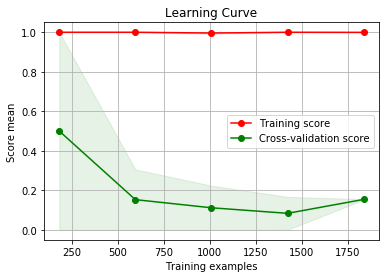

In [194]:
import sklearn_evaluation
sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)

In [211]:
process_path(file_path)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 91: invalid start byte

In [213]:
batch_size = 32
img_wid = 224
img_hei = 224
img_channel = 3

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == classes

def preprocess(file_path):
    img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(img, channels = img_channel)
    img = tf.image.resize(img, (img_wid, img_hei))
    img = tf.cast(img, tf.float32)
    img = img/255.0
    label = get_label(file_path)
    
    return img, label

output = list_ds.map(preprocess)

AUTOTUNE = tf.data.experimental.AUTOTUNE
inputs_tf_list = output.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size = AUTOTUNE)

In [217]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)
    
EPOCHS = 5
import time

for epoch in range(EPOCHS):
    start_time = time.time()
    for images, labels in inputs_tf_list:
        train_step(images, labels)
    end_time = start_time-time.time()
    print(train_loss.result(), train_accuracy.result()*100, end_time)


tf.Tensor(0.3384757, shape=(), dtype=float32) tf.Tensor(90.136246, shape=(), dtype=float32) -17.26717209815979
tf.Tensor(0.2603048, shape=(), dtype=float32) tf.Tensor(91.63487, shape=(), dtype=float32) -17.2177631855011
tf.Tensor(0.26098874, shape=(), dtype=float32) tf.Tensor(91.280655, shape=(), dtype=float32) -17.074421167373657
tf.Tensor(0.2469309, shape=(), dtype=float32) tf.Tensor(91.621254, shape=(), dtype=float32) -17.335543870925903
tf.Tensor(0.2422418, shape=(), dtype=float32) tf.Tensor(91.613075, shape=(), dtype=float32) -17.152166843414307
